In [1]:
#import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

In [35]:
#specifying the zip file name
file_name = "archive.zip
#opening the zip file in read mode
with zipfile.ZipFile(file_name,'r') as zip:
    print("extracting all files")
    zip.extractall()
    print("done")

extracting all files
done


In [2]:
#training data preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3115 files belonging to 36 classes.


In [3]:
#validation data preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 351 files belonging to 36 classes.


In [4]:
#building maodel
cnn = tf.keras.models.Sequential()

In [5]:
# apply normalization technique in the first layer (it will automatically normalize our image dataset pixels into 0-1)
cnn = tf.keras.Sequential([tf.keras.layers.Rescaling(1.0/255)])

In [6]:
#here we are decreasing the size of the matrix so that we can use those features which are important for our model
cnn.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = 3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

In [7]:
#to avoid overfitting we are passing these arguments
cnn.add(tf.keras.layers.Dropout(0.5))

In [8]:
#here we are flattenning our matrix
cnn.add(tf.keras.layers.Flatten())

In [9]:
#making the neurons
cnn.add(tf.keras.layers.Dense(units = 128,activation =  'relu'))

In [10]:
#collect output layer
cnn.add(tf.keras.layers.Dense(units = 36,activation = 'softmax'))

In [11]:
#compilling phase
cnn.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [23]:
#trainning phase
training_history = cnn.fit(x = training_set,validation_data  = validation_set,epochs = 30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.0498 - loss: 4.6706 - val_accuracy: 0.1368 - val_loss: 3.0682
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.1871 - loss: 2.9071 - val_accuracy: 0.3647 - val_loss: 2.1572
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.3429 - loss: 2.3098 - val_accuracy: 0.5527 - val_loss: 1.6305
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.4677 - loss: 1.8860 - val_accuracy: 0.6068 - val_loss: 1.4812
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.5966 - loss: 1.4819 - val_accuracy: 0.7436 - val_loss: 0.9442
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.6869 - loss: 1.1550 - val_accuracy: 0.8917 - val_loss: 0.5912
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.7965 - loss: 0.8191 - val_accuracy: 0.8917 - val_loss: 0.5277
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.8641 - loss: 0.5505 - val_accu

In [40]:
#saving the model in h5 file
cnn.save('trained_model.h5')

In [41]:
#saving the model in keras file
cnn.save('trained_model.keras')

In [42]:
#creating the history of the model
training_history.history

{'accuracy': [0.0789727121591568,
  0.2276083528995514,
  0.37945425510406494,
  0.5027287602424622,
  0.6263242363929749,
  0.7219903469085693,
  0.8080256581306458,
  0.8754414319992065,
  0.9094703197479248,
  0.9434992074966431,
  0.9617977738380432,
  0.9691813588142395,
  0.9784911870956421,
  0.9823434948921204,
  0.9829855561256409,
  0.9826645255088806,
  0.9829855561256409,
  0.9861958026885986,
  0.9861958026885986,
  0.9890850782394409,
  0.9871588945388794,
  0.9894061088562012,
  0.9861958026885986,
  0.9884430170059204,
  0.9906902313232422,
  0.9903692007064819,
  0.9894061088562012,
  0.9878009557723999,
  0.9887640476226807,
  0.9903692007064819],
 'loss': [3.708897829055786,
  2.743440866470337,
  2.198263645172119,
  1.7792617082595825,
  1.391789197921753,
  1.051700234413147,
  0.7503334879875183,
  0.5110574960708618,
  0.3714473843574524,
  0.26428183913230896,
  0.17782258987426758,
  0.14378316700458527,
  0.1029161810874939,
  0.084499791264534,
  0.071345224

In [43]:
#recordinng the history of the model
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [44]:
#calculating the accuracy of the the model achieved on validation
print("validation set Accuracy : {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set Accuracy : 96.01139426231384 %


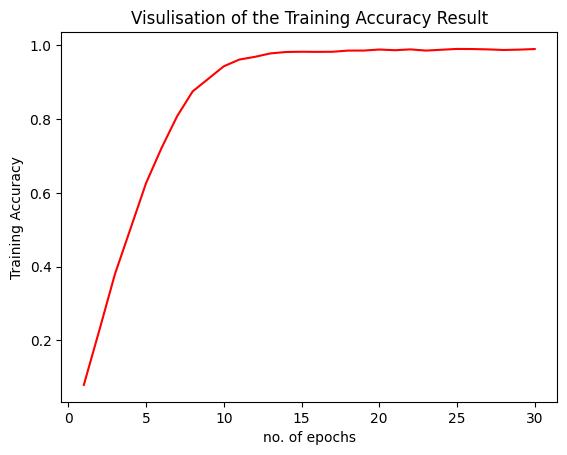

In [45]:
#visulisation of the training accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red')
plt.xlabel('no. of epochs')
plt.ylabel('Training Accuracy')
plt.title('Visulisation of the Training Accuracy Result')
plt.show()

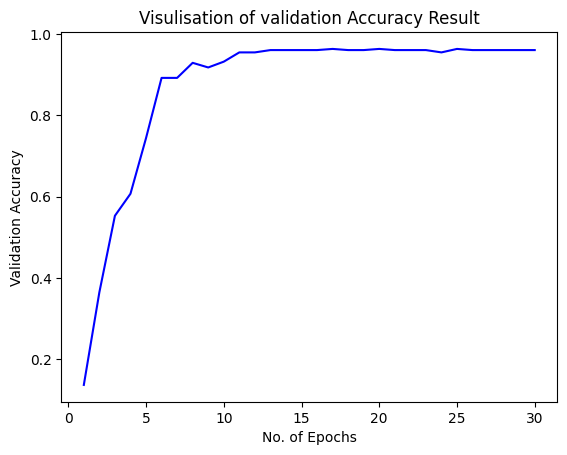

In [46]:
#visulisation of validation accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color = 'blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visulisation of validation Accuracy Result')
plt.show()